# Project: Investigate a Dataset : TMDb Dataset

### Introduction

In this project of my Data Analysis, I am investigating a TMDb movies database file which has collection of important detials of about 10k+ movies, including their details of budget, revenue, release dates, etc.

Let's take a glimpse at TMDb movie database csv file...

In [23]:
import pandas as pd

#reading tmdb csv file and storing that to a variable
glimpse_tmdb = pd.read_csv('tmdb-movies.csv')

#calling out first 5 rows (excluding headers) of tmdb database
glimpse_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Questions to be Answered
A .General questions about the dataset.

*  Which movie earns the most and least profit?
*  Which movie had the greatest and least runtime?
*  Which movie had the greatest and least budget?
*  Which movie had the greatest and least revenue?
*  What is the average runtime of all movies?
*  In which year we had the most movies making profits?

B .What are the similar characteristics does the most profitable movie have?
*  Average duration of movies.
*  Average Budget.
*  Average revenue.
*  Average profits.
*  Which director directed most films?
*  Which cast has appeared the most?
*  Which genre were more successful?
*  Which month released highest number of movies in all of the years? And which month made the most profit?

# Data Cleaning
#### Before answering the above questions we need a clean dataset which has columns and rows we need for calculations.

First, lets clean up the columns. We will only keep the columns we need and remove the rest of them.

Columns to delete -  id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average.

In [24]:
#importing all the nescessory libraries we need for our analysis
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#this variable will store the database of tmdb movies into a dataframe
movie_data = pd.read_csv('tmdb-movies.csv')

In [25]:
rows, col = movie_data.shape
#since 'rows' includes count of a header, we need to remove its count.
print('We have {} total entries of movies and {} columns/features of it.'.format(rows-1, col))

We have 10865 total entries of movies and 21 columns/features of it.


In [26]:
#lets give a list of movies that needs to be deleted
del_col = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

 
#deleting the columns from the database
movie_data = movie_data.drop(del_col, 1)
#now take a look at this new dataset
movie_data.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015


Now lets clean for any duplicate rows.

In [27]:
#will drop duplicate rows but will keep the first one
movie_data.drop_duplicates(keep = 'first', inplace = True)

rows, col = movie_data.shape
print('We now have {} total entries of movies and {} columns/features of it.'.format(rows-1, col))

We now have 10864 total entries of movies and 10 columns/features of it.


So we had one duplicate copy of a movie. Now we have 10864 movie entries.

#### Now, lets figure out which movies have a value of '0' in their budget or revenue, and then deleting those movies from database.

In [28]:
#giving list of column names that needs to be checked
check_row = ['budget', 'revenue']

#this will replace the value of '0' to NaN of columns given in the list
movie_data[check_row] = movie_data[check_row].replace(0, np.NaN)

#now we will drop any row which has NaN values in any of the column of the list (check_row) 
movie_data.dropna(subset = check_row, inplace = True)

rows, col = movie_data.shape
print('After cleaning, we now have only {} entries of movies.'.format(rows-1))

After cleaning, we now have only 3853 entries of movies.


As you saw in the previous dataset from having 10k+ rows and 21 columns we have now come down to 3853 rows and 10 columns. These many columns are needed for analysis and we have all the rows that have valid values for our calculations.

## Data Wrangling
#### Now first lets check if we have any movie with a runtime value of 0. If we have any, we will replace with NaN.

In [29]:
#replacing 0 with NaN of runtime column of the dataframe
movie_data['runtime'] = movie_data['runtime'].replace(0, np.NaN)

Now we need to convert the 'release_date' column to date format

In [30]:
#calling the column which need to be formatted in datetime and storing those values in them
movie_data.release_date = pd.to_datetime(movie_data['release_date'])

#showing the dataset
movie_data.head(2)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


In [31]:
#applymap function changes the columns data type to the type 'argument' we pass
change_coltype = ['budget', 'revenue']

movie_data[change_coltype] = movie_data[change_coltype].applymap(np.int64)
#shwoing the datatypes of all columns
movie_data.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

## Exploratory Data Analysis

Before answering the questions, lets figure out the profits of each movie.


In [32]:
#To calculate profit of each movie, we need to substract the budget from the revenue of each movie
movie_data.insert(2, 'profit', movie_data['revenue'] - movie_data['budget'])

#for just in case situations or for convenience, we change the data type to int
movie_data['profit'] = movie_data['profit'].apply(np.int64)

#showing the dataset
movie_data.head(2)

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


All the profits of the movies are now listed and our now a part of our dataset.

Now let's dig deep and answer the questions!


* Which movie earns the most and least profit?

In [33]:
def highest_lowest(column_name):
    
    #highest
    #taking the index value of the highest number in profit column
    highest_id = movie_data[column_name].idxmax()
    #calling by index number,storing that row info to a variable
    highest_details = pd.DataFrame(movie_data.loc[highest_id])
    
    #lowest
    #same processing as above
    lowest_id = movie_data[column_name].idxmin()
    lowest_details = pd.DataFrame(movie_data.loc[lowest_id])
    
    #concatenating two dataframes
    two_in_one_data = pd.concat([highest_details, lowest_details], axis = 1)
    
    return two_in_one_data

#calling the function and passing the argument
highest_lowest('profit')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


As we can see the Directed by James Cameron, Avatar film has the highest profit in all, making over $2.5B in profit in this dataset. 

* Which movie had the greatest and least runtime?

In [34]:
highest_lowest('runtime')

,2107,5162
budget,18000000,10
revenue,871279,5
profit,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


The name of the movie with shortest runtime is Kid's Story, runtime of just 15 min.

* Which movie had the greatest and least budget?

In [35]:
highest_lowest('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


we can see that The Warriors Way had the highest budget of all movies in the dataset of about $425M.

* Which movie had the greatest and least budget?

In [36]:
#again, we will call our function! 
highest_lowest('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
profit,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


Avatar movie also earning the most profit movie has made most revenue too! Making a revenue of more than $2.7B, it makes a logical sense that the more revenue you earn the more profit you gain.

* What is the average runtime of all movies?

In [37]:

#giving a function which calculates average of a particular column
def average_func(column_name):
    
    return movie_data[column_name].mean()

In [38]:
#calling function to show the mean
average_func('runtime')

109.22029060716139

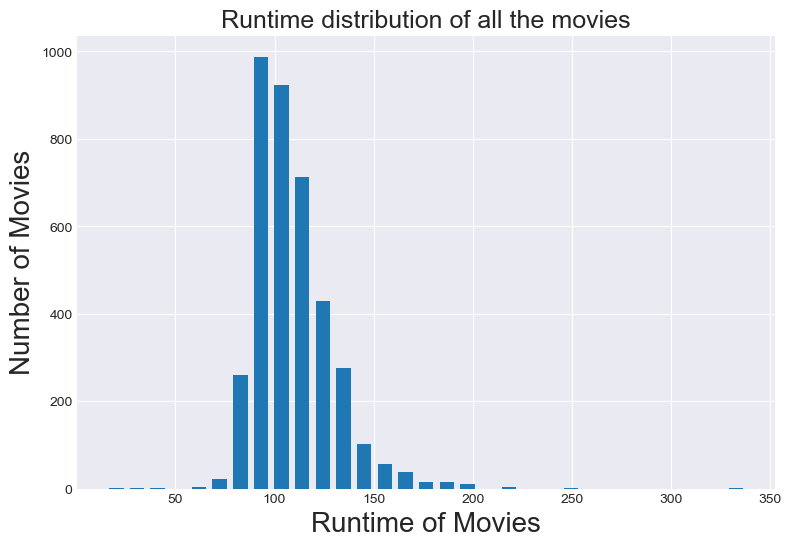

In [39]:
#plotting a histogram of runtime of movies

#gives styles to bg plot
sns.set_style('darkgrid')

#chaging the label size, this will change the size of all plots that we plot from now!
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)

#giving the figure size(width, height)
plt.figure(figsize=(9,6), dpi = 100)
#x-axis label name
plt.xlabel('Runtime of Movies', fontsize = 20)
#y-axis label name
plt.ylabel('Number of Movies', fontsize=20)
#title of the graph
plt.title('Runtime distribution of all the movies', fontsize=18)

#giving a histogram plot
plt.hist(movie_data['runtime'], rwidth = 0.7, bins =31)
#displays the plot
plt.show()

The above graph shows us that how many movies lie between the time interval x1 to x2. For example, as you can see the tallest bar here is time interval between 85-100 min(approx) and around 1000 movies out of 3855 movies have the runtime between these time intervals. So we can also say from this graph that mode time of movies is around 85-110 min, has the highest concentration of data points around this time interval. The distribution of this graph is positively skewed or right skewed!

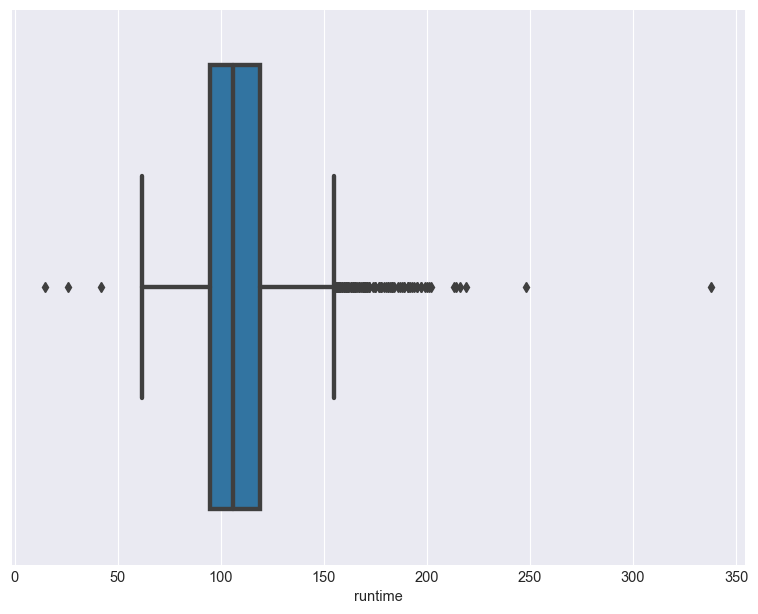

In [40]:
#giving two plots, thr first is the box plot, second is plots of runtime for movies
#giving figure size
plt.figure(figsize=(9,7), dpi = 105)

#using seaborn to plot
#plotting box plot
sns.boxplot(movie_data['runtime'], linewidth = 3)
#showing the plot
plt.show()

In [41]:
movie_data['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

Both visualizations above shows us the overall distribution of runtime of movies by plotting the points where they lie in the ditribution and how many movies percent of movies lie below the runtime.

What's amazing about box-plot is that it gives us an overall idea of how spread the ditribution in our case the runtime of movies are. First of all what we get from this visualization is how many outliers we have, the min and max points, the median and IQR.

As we already saw in our previous calculations of least and highest runtime, this is the appropriate visualization in the comparison of other movies runtime. By looking at the box-plot we don't get the exact values, for example you can guess that the median is will around 100-110 min but by giving the describe function above we get the exact values.

So by looking at both, visualiztions and calculations, we can say that..

* There are 25% of movies having a runtime of less than `95 min`.
* There are 50% of movies having a runtime of less than `109 min`. This is also the median of runtimes.
* There are 75% of movies having a runtime of less than `119 min`.
* 50% of movies have a runtime of between 95 min and `119 min`. 

next question
* In which year we had the most movies making profits?

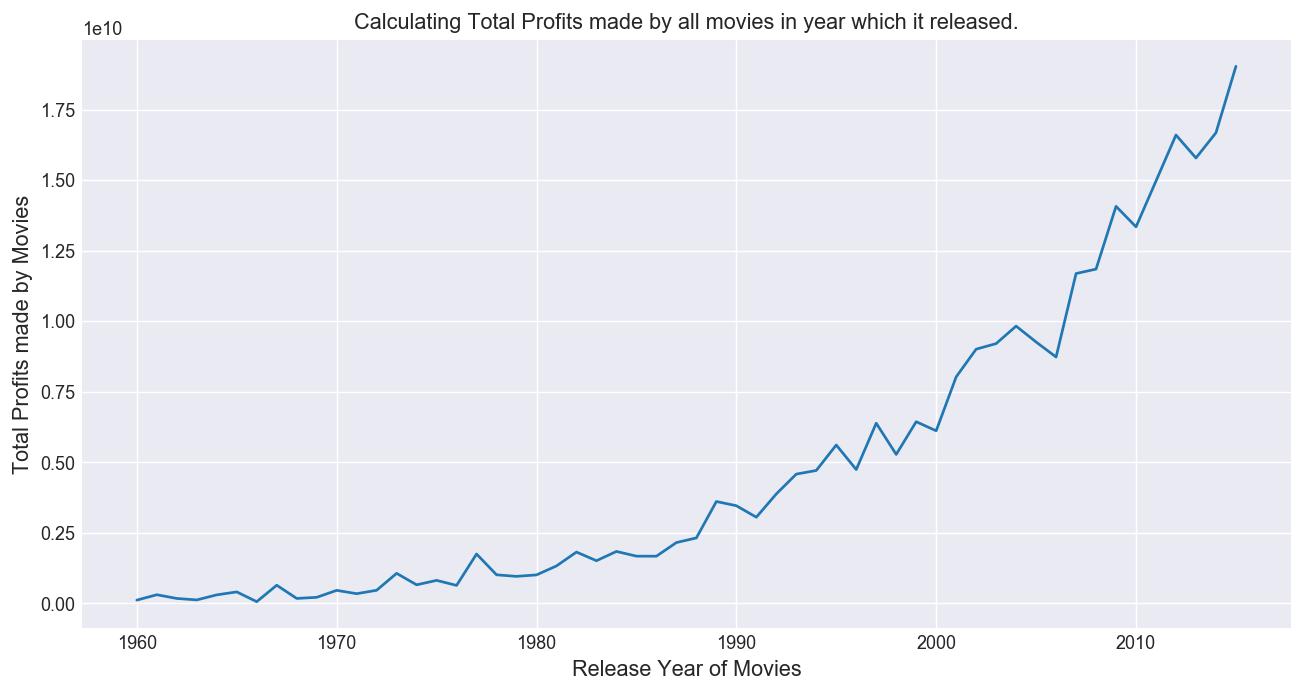

In [42]:
profits_each_year = movie_data.groupby('release_year')['profit'].sum()

#giving the figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#labeling x-axis
plt.xlabel('Release Year of Movies', fontsize = 12)
#labeling y-axis
plt.ylabel('Total Profits made by Movies', fontsize = 12)
#title of a the plot
plt.title('Calculating Total Profits made by all movies in year which it released.')

#plotting what needs to be plotted
plt.plot(profits_each_year)

#showing the plot
plt.show()

The year 2015, shows us the highest peak, having the highest profit than in any year, of more than 18 billion dollars. This graph doesn't exactly prove us that every year pass by, the profits of movies will increase but when we see in terms of decades it does show significant uprise in profits. At the year 2000, profits were around 8 biilion dollars, but in just 15 years it increased by 10+ biilion dollars. Last 15 years had a significant rise in profits compared to any other decades as we can see in the graph.

Not every year had same amount of movies released, the year 2015 had the most movie releases than in any other year. The more old the movies, the more less releases at that year (atleast this is what the dataset shows us).

In [43]:
profits_each_year.idxmax()

2015

In [44]:
#storing the values in the the form of DataFrame just to get a clean and better visual output
profits_each_year = pd.DataFrame(profits_each_year)
#printing out
profits_each_year.tail()

,profit
release_year,
2011,14966694704
2012,16596845507
2013,15782743325
2014,16676201357
2015,19032145273


2015 was the year where movies made the highest profit of about 19+ billion dollars which released in that year.

B
* Average runtime of movies


Before answering this question, we need to first clean the dataset so we only have the data of movies that made profit not loss. Also we need movies not only who just made profit by some dollars but we need movies who made significant profits and then analyzing similar characteristics of it.

In [45]:
#assinging new dataframe which holds values only of movies having profit $50M or more
profit_movie_data = movie_data[movie_data['profit'] >= 50000000]

#reindexing new dataframe
profit_movie_data.index = range(len(profit_movie_data))
#will initialize dataframe from 1 instead of 0
profit_movie_data.index = profit_movie_data.index + 1

#showing the dataset
profit_movie_data.head(2)

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


In [46]:
len(profit_movie_data)

1338

Now we have appropriate data to work on that is we have merged the data so that it becomes a little bit easy.

In [47]:
#giving a new average function since we have a different dataset
def prof_avg_fuc(column_name):
    return profit_movie_data[column_name].mean()


In [48]:
#mean of runtime
prof_avg_fuc('runtime')

113.66741405082212

Interesting! The mean time for movies making significant profits is likely similar to the mean runtime of movies that we found before of  109.2 which included movies having less than $50M profits. Difference of 4 minutes.

next question
* Average Budget of Movies

In [49]:

#calling the function
prof_avg_fuc('budget')

60444957.76083707

The average budget of movies of $50M club in profit is around `$60M dollars`.

Next question
* Average Revenue of Movies

In [51]:
prof_avg_fuc('revenue')

254957662.59491777

The average revenue of movies of $50M club in profit is around `$255M dollars`.

Next question
* Average Profit of Movies

In [53]:
prof_avg_fuc('profit')

194512704.83408073

The average profits of movies of $50M club in profit is around `$194M dollars`.

Next question
* Which directer directed most films?


In [54]:
def extract_data(column_name):
    #will take a column, and separate the string by '|'
    all_data = profit_movie_data[column_name].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    all_data = pd.Series(all_data.split('|'))
    
    #this will us value in descending order
    count = all_data.value_counts(ascending = False)
    
    return count

In [56]:
#this will variable will store the return value from a function
director_count = extract_data('director')
#shwoing top 5 values
director_count.head()

Steven Spielberg    23
Robert Zemeckis     13
Clint Eastwood      12
Tim Burton          11
Ridley Scott        10
dtype: int64

'Steven Spielberg' takes the crown! Directing 23 movies over $50M+ in profit is no joke! Also the other directors following along the list such as 'Robert Zemeckis', 'Clint Eastwood', 'Tim Burton' etc prove to be really great directors. Movies directed by these directors is more likely for a movie to make huge profits, the higher the movies they direct that earn huge profits, the higher the probability for a movie to go for success

Next question
* Which cast has appeared the most?

In [57]:
#this will variable will store the return value from a function
cast_count = extract_data('cast')
#shwoing top 5 values
cast_count.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

Tome Cruise' takes the crown for appearing the most in movies profiting more than $50M. Other actors well deserved it as you can see above! Directors hiring these actors will have higher probability of making huge profits also this doesn't mean that actors other than these acting in a film will make less profit.

Next question
* Which genre were more successful?

In [58]:
#this will variable will store the return value from a function
genre_count = extract_data('genres')
#shwoing top 5 values
genre_count.head()

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

#### Let's visualize it with a plot

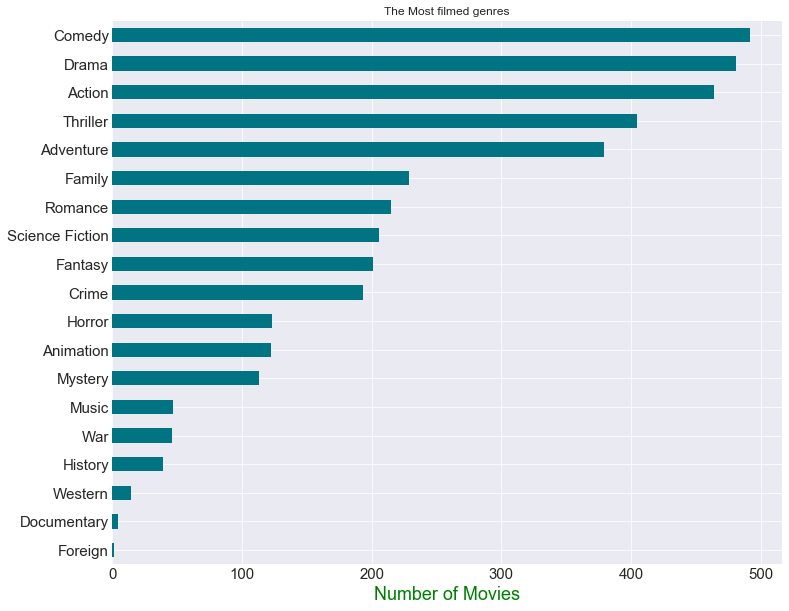

In [59]:
#we want plot to plot points in descending order top to bottom
#since our count is in descending order and graph plot points from bottom to top, our graph will be in ascending order form top to bottom
#hence lets give the series in ascending order
genre_count.sort_values(ascending = True, inplace = True)

#initializing plot
ax = genre_count.plot.barh(color = '#007482', fontsize = 15)

#giving a title
ax.set(title = 'The Most filmed genres')

#x-label
ax.set_xlabel('Number of Movies', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(12, 10)

#shwoing the plot
plt.show()

Another amazing results. Action, Drama and Comedy genres are the most as visualized but Comedy takes the prize, about 492 movies have genres comedy which make $50M+ in profit. In comparison, even `Adventure` and `Thriller` really play the role. These five genres have more number of movies than rest of the genres as shown by visualization. Probability of earning more than \$50M for these genres are higher, but still other genres do count too again it depends on lots of other influential factors that come in play. Western, war, history, music, documentary and the most least foreign genres have less probability to make this much in profit as in comparison to other genre.

Next question
* Which month released highest number of movies in all of the years? And which month made the most profit?¶

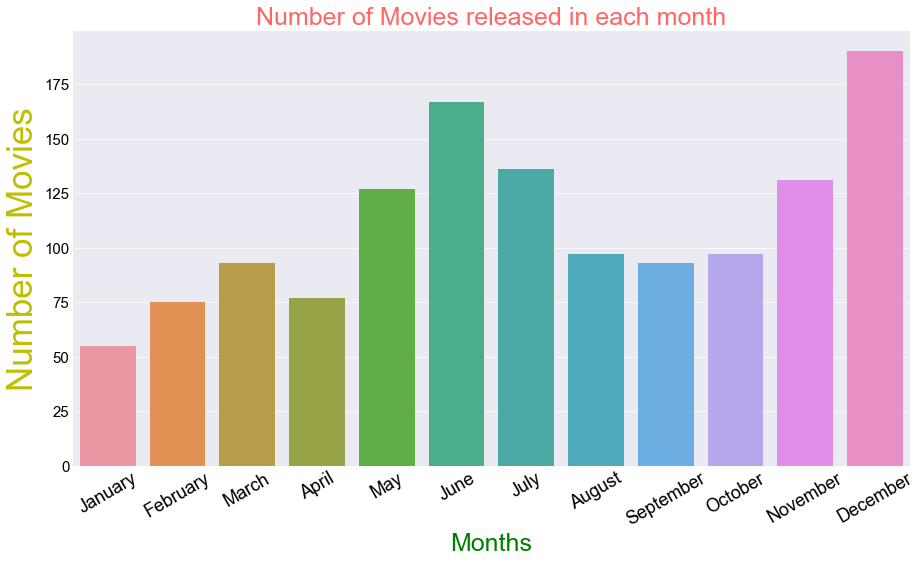

In [61]:
#for answering this question we need to group all of the months of years and then calculate the profits of those months
#giving a new dataframe which gives 'release-date' as index
index_release_date = profit_movie_data.set_index('release_date')

#now we need to group all the data by month, since release date is in form of index, we extract month from it
groupby_index = index_release_date.groupby([(index_release_date.index.month)])

#this will give us how many movies are released in each month
monthly_movie_count = groupby_index['profit'].count()

#converting table to a dataframe
monthly_movie_count= pd.DataFrame(monthly_movie_count)

#giving a list of months
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_movie_count_bar = sns.barplot(x = monthly_movie_count.index, y = monthly_movie_count['profit'], data = monthly_movie_count)

#setting size of the graph
monthly_movie_count_bar.figure.set_size_inches(15,8)

#setting the title and customizing
monthly_movie_count_bar.axes.set_title('Number of Movies released in each month', color="r", fontsize = 25, alpha = 0.6)

#setting x-label
monthly_movie_count_bar.set_xlabel("Months", color="g", fontsize = 25)
#setting y-label
monthly_movie_count_bar.set_ylabel("Number of Movies", color="y", fontsize = 35)

#customizing axes values
monthly_movie_count_bar.tick_params(labelsize = 15, labelcolor="black")

#rotating the x-axis values to make it readable
monthly_movie_count_bar.set_xticklabels(month_list, rotation = 30, size = 18)

#shows the plot
plt.show()

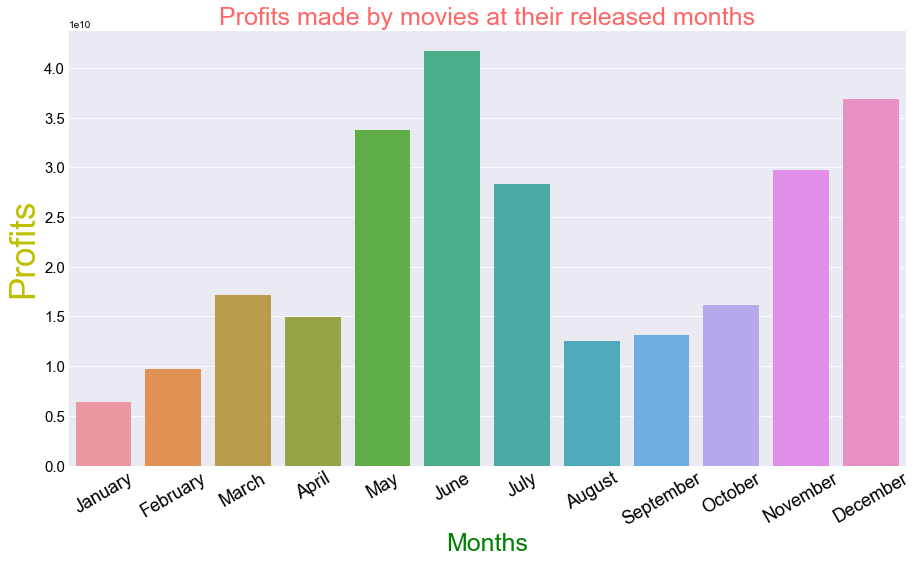

In [62]:
#finding the second part of this question

#now since the data is grouped by month, we add 'profit_(in_US_Dollars)' values to respective months, saving all this to a new var
monthly_profit = groupby_index['profit'].sum()

#converting table to a dataframe
monthly_profit = pd.DataFrame(monthly_profit)

#giving seaborn bar plot to visualize the data
#giving values to our graph
monthly_profit_bar = sns.barplot(x = monthly_profit.index, y = monthly_profit['profit'], data = monthly_profit)

#setting size of the graph
monthly_profit_bar.figure.set_size_inches(15,8)

#setting the title and customizing
monthly_profit_bar.axes.set_title('Profits made by movies at their released months', color="r", fontsize = 25, alpha = 0.6)

#setting x-label
monthly_profit_bar.set_xlabel("Months", color="g", fontsize = 25)
#setting y-label
monthly_profit_bar.set_ylabel("Profits", color="y", fontsize = 35)

#customizing axes values
monthly_profit_bar.tick_params(labelsize = 15, labelcolor="black")

#rotating the x-axis values to make it readable
monthly_profit_bar.set_xticklabels(month_list, rotation = 30, size = 18)

#shows the plot
plt.show()

Seeing the both visualizations of both graphs we see similar trend. Where there are more movie released there is more profit and vice versa but just not for one month i.e December. December is the month where most movie release but when compared to profits it ranks second. This means that december month has high release rate but less profit margin. The month of June where we have around 165 movie releases, which is second highest, is the highest in terms of making profits.

## Conclusion

Q. If i wanted to show one of the best and most profitable movie, who would i hire as director and cast, which genre would i choose and also at what month would i release the movie in?

Ans. I would..

Choose any director from this - Steven Spielberg, Robert Zemeckis, Ron Howard, Tony Scott, Ridley Scott.

Choose any cast from this - Actors - Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone, Denzel Washington.

Actress - Julia Roberts, Anne Hathaway, Angelina Jolie, Scarlett Johansson.

Choose these genre - Action, Adventure, Thriller, Comedy, Drama.

Choose these release months - May, June, July, November, December.

#### Limitation
I want to make it clear, it's not 100 percent guaranteed solution that this formula is gonna work, meaning we are going to earn more than \$50M! But it shows us that we have high probability of making high profits if we had similar characteristics as such. All these directors, actors, genres and released dates have a common trend of attraction. If we release a movie with these characteristics, it gives people high expectations from this movie. Thus attracting more people towards the movie but it ultimately comes down to story mainly and also other important influential factors. People having higher expectations gives us less probability of meeting their expectations. Even if the movie was worth, people's high expectations would lead in biased results ultimately effecting the profits. We also see this in real life specially in sequels of movies. 

In [63]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'untitled1.ipynb'])

0